In [162]:
#Install packages:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.patches as mpatches

import requests
import math
import csv

In [163]:
#read characteristics and metadata from csv to dfs:
datasets_char = pd.read_csv('../thesis/Datasets_combined_characteristics.csv')
datasets_meta = pd.read_csv('../thesis/Datasets_combined_Metadata.csv')

In [164]:
datasets_char

,Unnamed: 0,Data set name,Access type,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Comment
0,0,Belarus,Not availble anymore,https://tbportals.niaid.nih.gov,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BIMCV-COVID19+,Public*,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020.0,3,2023.0,Padchest,Y,Y,Y,Y,* requires filling in formular
2,2,BRAX,By request,https://physionet.org/content/brax/1.1.0/,Brazil,2022.0,1.1.0,2022.0,N,N,Y,Y,Y,NaN
3,3,CANDID-PTX,By request,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021.0,NaN,2021.0,N,Y,Y,Y,Y,NaN
4,4,Chest x-ray disease images,Public,https://www.kaggle.com/datasets/parsagouran/ch...,NaN,2023.0,NaN,2023.0,NaN,N,N,N,N,NaN
5,5,Chest X-Rays - Covid19 Pakistan,Public,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020.0,1,2020.0,NaN,Y,N,N,N,NaN
6,6,Chest X-Rays Dataset,Public,https://datasetsearch.research.google.com/sear...,NaN,2018.0,NaN,2018.0,NaN,Y,N,N,N,NaN
7,7,CHEST-XRAY-PNEUMONIA,Restricted,https://ieee-dataport.org/documents/chest-xray...,NaN,2021.0,NaN,2021.0,NaN,N,N,N,N,Requires log in to IEEE port (payment)
8,8,ChestX-ray14,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020.0,NaN,2020.0,ChestX-ray8,Y,N,N,N,NaN
9,9,ChestX-ray8,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017.0,NaN,2017.0,NaN,Y,N,N,N,NaN


In [165]:
#drop unnamed:0 column:
datasets_char = datasets_char.drop(columns='Unnamed: 0')

In [166]:
datasets_char

,Data set name,Access type,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Comment
0,Belarus,Not availble anymore,https://tbportals.niaid.nih.gov,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BIMCV-COVID19+,Public*,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020.0,3,2023.0,Padchest,Y,Y,Y,Y,* requires filling in formular
2,BRAX,By request,https://physionet.org/content/brax/1.1.0/,Brazil,2022.0,1.1.0,2022.0,N,N,Y,Y,Y,NaN
3,CANDID-PTX,By request,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021.0,NaN,2021.0,N,Y,Y,Y,Y,NaN
4,Chest x-ray disease images,Public,https://www.kaggle.com/datasets/parsagouran/ch...,NaN,2023.0,NaN,2023.0,NaN,N,N,N,N,NaN
5,Chest X-Rays - Covid19 Pakistan,Public,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020.0,1,2020.0,NaN,Y,N,N,N,NaN
6,Chest X-Rays Dataset,Public,https://datasetsearch.research.google.com/sear...,NaN,2018.0,NaN,2018.0,NaN,Y,N,N,N,NaN
7,CHEST-XRAY-PNEUMONIA,Restricted,https://ieee-dataport.org/documents/chest-xray...,NaN,2021.0,NaN,2021.0,NaN,N,N,N,N,Requires log in to IEEE port (payment)
8,ChestX-ray14,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020.0,NaN,2020.0,ChestX-ray8,Y,N,N,N,NaN
9,ChestX-ray8,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017.0,NaN,2017.0,NaN,Y,N,N,N,NaN


In [167]:
datasets_meta

,Unnamed: 0,Data set name,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments
0,0,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BIMCV-COVID19+,5530.0,1311.0,2429.0,PNG,"frontal,lateral",NaN,"Covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,"*Diseases identified in 50 or more cases,This ..."
2,2,BRAX,40967.0,19351.0,24959.0,DICOM,"Frontal,lateral",14.0,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",NaN,NaN,Age/Gender is not stated can be accessed by fu...
3,3,CANDID-PTX,19237.0,NaN,NaN,DICOM,Frontal (incl. bedside),4.0,"Pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male, 8929 female, 30 NA",NaN
4,4,Chest x-ray disease images,572.0,NaN,NaN,"jpg, jpeg",NaN,NaN,NaN,NaN,NaN,NaN
5,5,Chest X-Rays - Covid19 Pakistan,527.0,75.0,NaN,JPEG,Frontal,2.0,"Covid-19, non-covid-19",NaN,NaN,NaN
6,6,Chest X-Rays Dataset,910.0,NaN,NaN,"jpg, jpeg, png, gif",NaN,5.0,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NaN,NaN,NaN
7,7,CHEST-XRAY-PNEUMONIA,NaN,NaN,NaN,NaN,NaN,NaN,Pneumonia,NaN,NaN,NaN
8,8,ChestX-ray14,112120.0,30805.0,NaN,png,Frontal,14.0,"Atelectasis, Infiltration, Pneumothorax, Effus...",NaN,NaN,NaN
9,9,ChestX-ray8,108948.0,32717.0,NaN,png,Frontal,8.0,"Atelectasis, Infiltration, Pneumothorax, Effus...",NaN,NaN,NaN


In [168]:
#drop unnamed:0 column:
datasets_meta = datasets_meta.drop(columns='Unnamed: 0')

In [169]:
datasets_char.groupby('Access type').nunique()

,Data set name,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Comment
Access type,,,,,,,,,,,,
By request,4,4,4,3,1,3,1,2,3,2,2,0
Not available anymore,1,1,0,0,0,0,0,1,1,1,1,0
Not availble anymore,1,1,1,0,0,0,0,0,0,0,0,0
Partially public,1,1,0,1,0,1,1,1,1,1,1,1
Pubic,1,1,1,1,1,1,0,1,1,1,1,0
Publc,1,1,0,1,0,1,0,1,1,1,1,0
Public,28,25,11,9,3,8,5,2,3,2,2,2
Public*,5,5,4,4,2,4,1,2,3,2,2,4
Restricted,2,2,1,2,1,2,0,2,2,1,1,2


In [170]:
#clean text for access type:
datasets_char['Access type'] = datasets_char['Access type'].replace({'Pubic':'Public', 'Publc':'Public', 'Not availble anymore':'Not available anymore'})

In [171]:
#re-view the different access types:
datasets_char.groupby('Access type').nunique()

,Data set name,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Comment
Access type,,,,,,,,,,,,
By request,4,4,4,3,1,3,1,2,3,2,2,0
Not available anymore,2,2,1,0,0,0,0,1,1,1,1,0
Partially public,1,1,0,1,0,1,1,1,1,1,1,1
Public,30,27,12,9,4,8,5,2,3,2,2,2
Public*,5,5,4,4,2,4,1,2,3,2,2,4
Restricted,2,2,1,2,1,2,0,2,2,1,1,2


In [172]:
#remove the datasets that are not available anymore, restricted or by need request:
datasets_char= datasets_char[datasets_char['Access type'].str.contains('By request')==False]
datasets_char= datasets_char[datasets_char['Access type'].str.contains('Not available anymore')==False]
datasets_char= datasets_char[datasets_char['Access type'].str.contains('Restricted')==False]

In [173]:
#reset index to add the index to a seperate column:
datasets_char=datasets_char.reset_index()

In [174]:
#There are 36 datasets left:
datasets_char['index'].count()

36

In [175]:
datasets_char

,index,Data set name,Access type,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Comment
0,1,BIMCV-COVID19+,Public*,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020.0,3,2023.0,Padchest,Y,Y,Y,Y,* requires filling in formular
1,4,Chest x-ray disease images,Public,https://www.kaggle.com/datasets/parsagouran/ch...,NaN,2023.0,NaN,2023.0,NaN,N,N,N,N,NaN
2,5,Chest X-Rays - Covid19 Pakistan,Public,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020.0,1,2020.0,NaN,Y,N,N,N,NaN
3,6,Chest X-Rays Dataset,Public,https://datasetsearch.research.google.com/sear...,NaN,2018.0,NaN,2018.0,NaN,Y,N,N,N,NaN
4,8,ChestX-ray14,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020.0,NaN,2020.0,ChestX-ray8,Y,N,N,N,NaN
5,9,ChestX-ray8,Public,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017.0,NaN,2017.0,NaN,Y,N,N,N,NaN
6,10,CheXpert,Public*,https://stanfordmlgroup.github.io/competitions...,USA,2019.0,1.0,2019.0,NaN,Y,N,N,N,* requires filling in formular
7,11,COVID 19 Xray Image Dataset with Huge Samples,Public,https://www.kaggle.com/datasets/mr3suvhro/covi...,NaN,2020.0,NaN,2020.0,NaN,N,N,N,N,NaN
8,12,COVID-19 AND NORMAL CHEST X-RAY,Public*,https://ieee-dataport.org/open-access/covid-19...,China,2021.0,NaN,2021.0,NaN,N,N,N,N,*Requires log in to IEEE port (NO payment)
9,13,covid-19 chest x-ray detection dataset,Public,https://www.kaggle.com/datasets/rahulmakwana/c...,NaN,2020.0,1,2020.0,NaN,N,N,N,N,NaN


In [177]:
#distribution of geographical spread:
geo = datasets_char.groupby('Country of origin')['index'].nunique()

In [178]:
#reset index:
geo = geo.reset_index()

In [179]:
#sort values: descending order:
geo = geo.sort_values(by=['index'], ascending=True)

Text(0, 0.5, ' ')

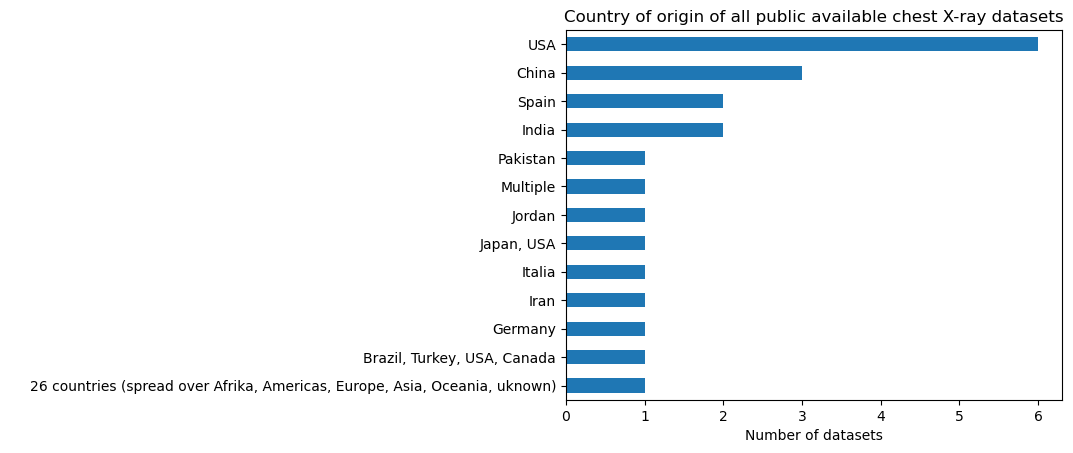

In [180]:
#barplot of geographical origins of datasets:
ax = geo.plot.barh(x='Country of origin', y='index', legend=False, title='Country of origin of all public available chest X-ray datasets')
ax.set_xlabel('Number of datasets')
ax.set_ylabel(' ')

In [185]:
#group by publication year and reset index:
publication_year = datasets_char.groupby('Year of dataset publication')['index'].nunique().reset_index()

In [186]:
publication_year

,Year of dataset publication,index
0,2000,1
1,2014,4
2,2015,1
3,2017,2
4,2018,1
5,2019,2
6,2020,15
7,2021,6
8,2022,1
9,2023,3


In [187]:
publication_year['Year of dataset publication'] = publication_year['Year of dataset publication'].astype(int)

In [188]:
publication_year

,Year of dataset publication,index
0,2000,1
1,2014,4
2,2015,1
3,2017,2
4,2018,1
5,2019,2
6,2020,15
7,2021,6
8,2022,1
9,2023,3


Text(0, 0.5, 'Number of datasets')

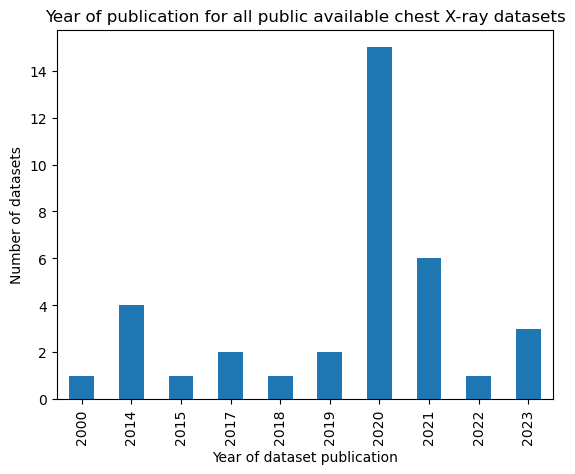

In [189]:
#barplot of year of publication of datasets:
ax = publication_year.plot.bar(x='Year of dataset publication', y='index', legend=False, title='Year of publication for all public available chest X-ray datasets')
ax.set_ylabel('Number of datasets')

In [191]:
#group by Collection period stated and reset index:
collec_period = datasets_char.groupby('Data collection period (Y/N)')['index'].nunique().reset_index()

In [195]:
collec_period

,Data collection period (Y/N),index
0,N,21
1,Y,13


In [214]:
#group by participant consent stated and reset index:
paticipant_consent = datasets_char.groupby('Statement on participant consent (Y/N)')['index'].nunique().reset_index()

In [215]:
paticipant_consent

,Statement on participant consent (Y/N),index
0,N,25
1,N*,6
2,Y,3


Text(0, 0.5, ' ')

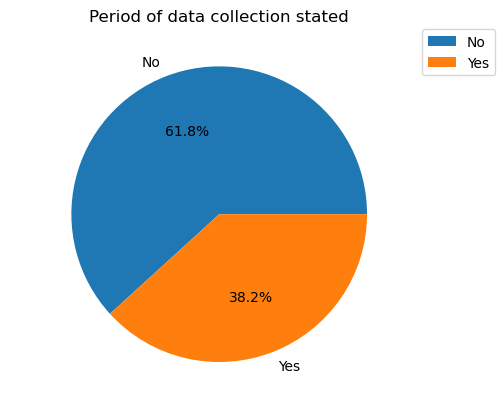

In [220]:
labels = ['No', 'Yes']

ax = collec_period.plot.pie(y='index', title="Period of data collection stated", labels=labels,
                   autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_ylabel(' ')